# PCA
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv('./EFA.csv')

In [3]:
data.head()

,Price,Safety,Exterior_Looks,Space_comfort,Technology,After_Sales_Service,Resale_Value,Fuel_Type,Fuel_Efficiency,Color,Maintenance,Test_drive,Product_reviews,Testimonials
0,4,4,5,4,3,4,5,4,4,2,4,2,4,3
1,3,5,3,3,4,4,3,4,3,4,3,2,2,2
2,4,4,3,4,5,5,5,4,5,4,5,4,4,3
3,4,4,4,3,3,4,5,5,4,4,4,2,5,3
4,5,5,4,4,5,4,5,3,4,5,5,5,5,2


In [5]:
data.max()

Price                  5
Safety                 5
Exterior_Looks         5
Space_comfort          5
Technology             5
After_Sales_Service    5
Resale_Value           5
Fuel_Type              5
Fuel_Efficiency        5
Color                  5
Maintenance            5
Test_drive             5
Product_reviews        5
Testimonials           5
dtype: int64

In [6]:
data.min()

Price                  3
Safety                 3
Exterior_Looks         1
Space_comfort          2
Technology             1
After_Sales_Service    2
Resale_Value           1
Fuel_Type              3
Fuel_Efficiency        1
Color                  1
Maintenance            2
Test_drive             1
Product_reviews        2
Testimonials           1
dtype: int64

In [7]:
# importing PCA

from sklearn.decomposition import PCA
pca=PCA()

In [8]:
pca.fit(data)

PCA()

### Explained Varience: Eigen Values 

In [9]:
eigValues= pca.explained_variance_

In [10]:
eigValues

array([2.15856943, 1.68367596, 1.07094492, 0.9760982 , 0.77234806,
       0.63648416, 0.52119561, 0.42455873, 0.39422686, 0.36002998,
       0.27478093, 0.23069044, 0.17746461, 0.15888215])

### Percentage of information

In [11]:
ratio= pca.explained_variance_ratio_

In [12]:
ratio

array([0.21936792, 0.17110615, 0.10883642, 0.09919747, 0.07849106,
       0.06468368, 0.0529673 , 0.04314643, 0.04006391, 0.0365886 ,
       0.02792503, 0.02344427, 0.01803511, 0.01614664])

In [13]:
# Cummalative sum

ratio_cum= np.cumsum(ratio)
ratio_cum

array([0.21936792, 0.39047407, 0.49931049, 0.59850797, 0.67699902,
       0.7416827 , 0.79465   , 0.83779643, 0.87786034, 0.91444894,
       0.94237397, 0.96581824, 0.98385336, 1.        ])

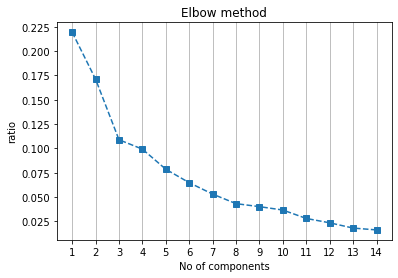

In [18]:
# Elbow method
plt.plot(ratio, 's--')
plt.title("Elbow method")
plt.xlabel("No of components")
plt.ylabel("ratio")
plt.grid(axis='x')
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

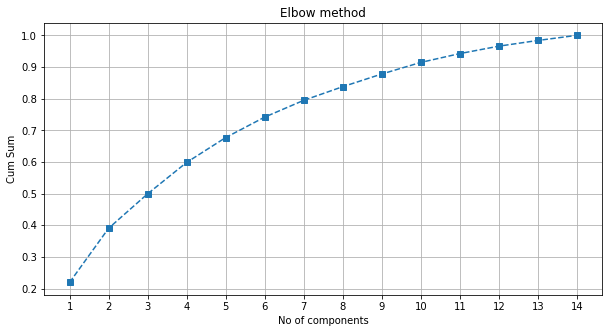

In [28]:
plt.figure(figsize=(10,5))
plt.plot(ratio_cum, 's--')
plt.title("Elbow method")
plt.xlabel("No of components")
plt.ylabel("Cum Sum")
plt.grid()
plt.xticks(list(range(0,len(ratio))),list(range(1,len(ratio)+1)))
plt.show()

## We will select 8 components, as cum sum is greater than 80%

In [21]:
pca=PCA(n_components=8)

In [23]:
data_PCA= pca.fit_transform(data)

In [24]:
data_PCA

array([[ 0.25531265,  2.08242012,  1.79559216,  0.37465305, -1.10913963,
         0.73562708, -0.11523546,  0.51799692],
       [ 2.3032295 ,  2.27657646, -0.73197218, -0.14882089,  2.04787126,
        -0.12961924,  0.05817082,  0.24793885],
       [-2.03013756,  0.38448151, -0.0091973 ,  0.52733121,  1.2626845 ,
        -0.2326752 ,  0.16040997, -0.02237689],
       [-0.72808792,  1.99931622, -0.13232929, -0.03259164, -0.99369026,
         0.81938535,  0.10119635,  0.41002952],
       [-2.35711099,  0.12884784,  0.35748049,  0.08301966,  0.93886663,
        -0.73346872,  2.09344738, -0.08597646],
       [ 2.65546087,  1.65465133,  1.42916119,  0.51213755,  0.5299249 ,
        -0.32524003, -0.80374732,  1.113342  ],
       [ 0.58418151, -0.73146631,  0.16545095, -1.9497661 ,  2.3500609 ,
         0.77701633, -1.17652473,  0.65451418],
       [-0.98493953,  1.37384118, -0.38669619,  0.81901976, -0.82363721,
        -1.29968751, -0.5037025 ,  0.32869534],
       [-0.65209948,  1.44778522

In [25]:
data_PCA.shape

(90, 8)

In [26]:
pd.DataFrame(data_PCA)

,0,1,2,3,4,5,6,7
0,0.255313,2.082420,1.795592,0.374653,-1.109140,0.735627,-0.115235,0.517997
1,2.303229,2.276576,-0.731972,-0.148821,2.047871,-0.129619,0.058171,0.247939
2,-2.030138,0.384482,-0.009197,0.527331,1.262684,-0.232675,0.160410,-0.022377
3,-0.728088,1.999316,-0.132329,-0.032592,-0.993690,0.819385,0.101196,0.410030
4,-2.357111,0.128848,0.357480,0.083020,0.938867,-0.733469,2.093447,-0.085976
...,...,...,...,...,...,...,...,...
85,-1.140951,-0.428794,-0.570704,0.154523,-0.041121,-0.646703,0.772743,-0.769314
86,-0.461537,-1.086756,-0.946329,-0.182370,-0.427307,-1.018053,0.573958,0.702599
87,1.239788,0.510571,-0.137245,0.409839,-0.779380,0.326910,-0.772130,0.835755
88,0.078321,-1.018721,-0.723044,-0.684966,0.278394,0.078589,-0.519182,-0.352692


In [29]:
pca.components_

array([[-0.18227112,  0.09628467,  0.07595838, -0.00221968, -0.05812014,
        -0.13588247, -0.63823307, -0.02411243, -0.38586723, -0.30100285,
        -0.36251032, -0.26551373, -0.28354373,  0.01274717],
       [ 0.06037599, -0.06178098, -0.16008751, -0.26068148, -0.21216104,
        -0.15944812,  0.46244234, -0.11907056, -0.13898009, -0.06777595,
         0.02943741, -0.59462442, -0.24925043, -0.40001086],
       [ 0.03858712, -0.02233605,  0.4856906 ,  0.05445947, -0.10005976,
         0.02141581,  0.35107982,  0.00993132, -0.10127855, -0.63175992,
        -0.0991878 ,  0.40464082, -0.13418286, -0.15610665],
       [ 0.13669342,  0.13107231,  0.12268426,  0.34577401,  0.60170422,
         0.25151365, -0.00445443,  0.33998538,  0.00543202, -0.19934001,
         0.13361973, -0.39862356,  0.11990823, -0.24022485],
       [-0.15282925,  0.23380104, -0.339593  , -0.01158933,  0.15757625,
         0.25348782, -0.04726902,  0.08021202,  0.0760234 ,  0.14202279,
         0.00208466,  0.38